# Recurrent Neural Network with Long Short-Term Memory- RNN + LSTM  

Long Short-Term Memory (LSTM) is a type of recurrent neural network (RNN) architecture designed to overcome the vanishing gradient problem in traditional RNNs, allowing them to effectively capture and learn long-term dependencies in sequential data.

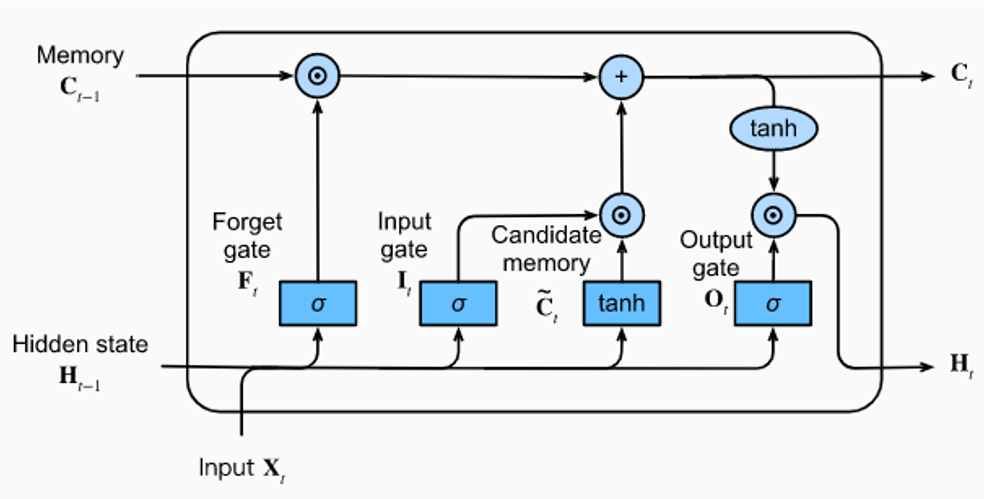

Here's an explanation of LSTM and its key components:

1. **Cell State**: The LSTM architecture includes a cell state that runs through the entire sequence with minor linear interactions. This allows LSTMs to retain information over long periods, mitigating the vanishing gradient problem. The cell state can be thought of as a conveyor belt that runs straight down the entire chain, with only some minor linear interactions.

2. **Three Gates**: LSTMs have three gates that control the flow of information:
   - **Forget Gate**: Decides what information to discard or forget from the cell state. It takes the previous hidden state and the current input and outputs a number between 0 and 1 for each number in the cell state. A 1 means "completely keep this" while a 0 means "completely get rid of this".
   - **Input Gate**: Decides what new information to store in the cell state. It consists of two parts:
     - A sigmoid layer called the "input gate layer" that decides which values will be updated.
     - A tanh layer that creates a vector of new candidate values that could be added to the state. 
   - **Output Gate**: Decides what the next hidden state should be. It is determined by the current input, the previous hidden state, and the new candidate values. The output gate consists of a sigmoid layer that decides which parts of the cell state to output and a tanh layer that squashes the values to lie between -1 and 1.

3. **Hidden State**: The LSTM also has a hidden state  at each time step, which is the output of the LSTM unit for that time step. It is a function of the current input , the previous hidden state , and the current cell state . The hidden state contains information about the sequence seen up to the current time step and is used to make predictions or classifications.

By using these mechanisms, LSTMs can effectively learn and remember long-range dependencies in sequential data, making them particularly suitable for tasks such as time series prediction, natural language processing, speech recognition, and more. They have become a cornerstone in sequence modeling due to their ability to handle sequences of varying lengths and capture complex patterns over time.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv('data/Alcohol_Sales.csv',index_col='DATE',parse_dates=True)
df.index.freq = 'MS'

In [46]:
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [47]:
df.tail()

,S4248SM144NCEN
DATE,
2018-09-01,12396
2018-10-01,13914
2018-11-01,14174
2018-12-01,15504
2019-01-01,10718


In [48]:
df.columns = ['Sales']

<Axes: xlabel='DATE'>

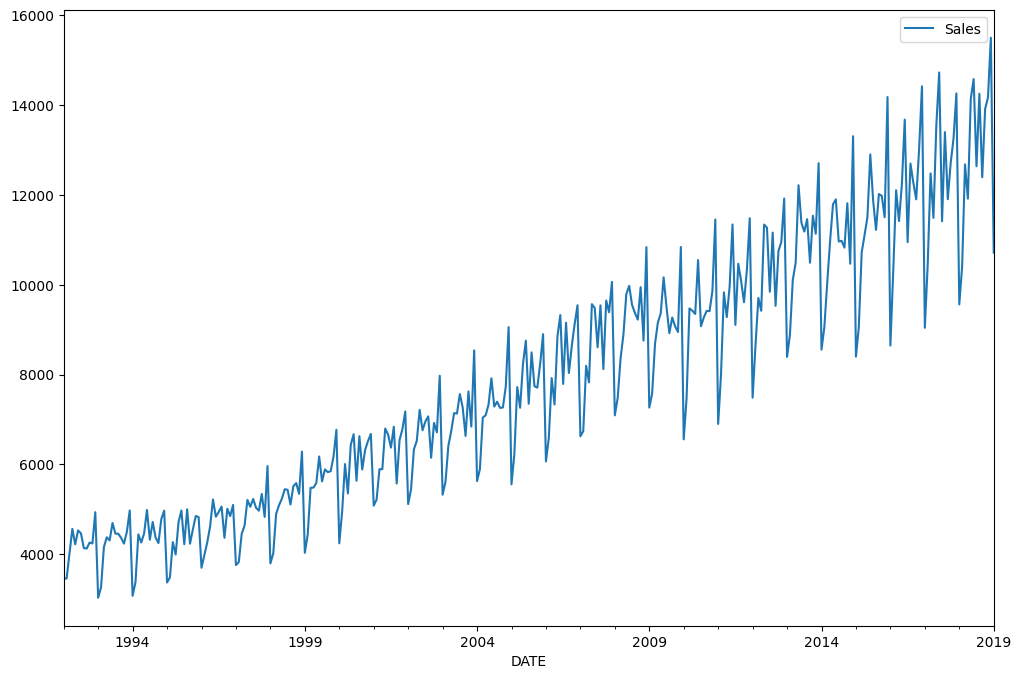

In [49]:
df.plot(figsize=(12,8))

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose
results = seasonal_decompose(df['Sales'])

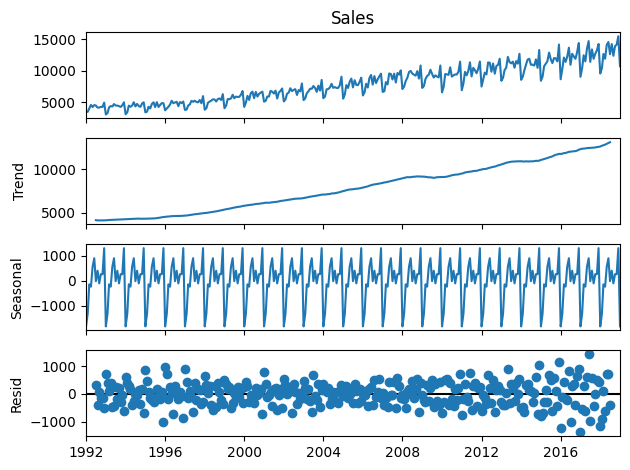

In [51]:
results.plot();

## Split Data

In [52]:
len(df)

325

In [53]:
train = df.iloc[:325-12]
test = df.iloc[325-12:]

In [54]:
len(test)

12

## Scale Data

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# FIT ONLY TRAIN DATA, OTHERWISE LEAKS SOME OF THE TEST DATA
scaler.fit(train)

scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

## Generate time series data to cover test data

In [56]:
from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [57]:
len(df)-12-12  # Subtract test data and then subtract elements to build first array

301

In [58]:
len(generator)

301

In [59]:
generator[0]

(array([[[0.03658432],
         [0.03649885],
         [0.08299855],
         [0.13103684],
         [0.1017181 ],
         [0.12804513],
         [0.12266006],
         [0.09453799],
         [0.09359774],
         [0.10496624],
         [0.10334217],
         [0.16283443]]]),
 array([[0.]]))

In [60]:
generator[0][0].shape

(1, 12, 1)

In [61]:
generator[0][1].shape

(1, 1)

# Create the Model

In [62]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               40800     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.fit_generator(generator,epochs=20)

Epoch 1/20


/tmp/ipykernel_4656/3989200883.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=20)
2024-03-16 17:11:10.894257: I tensorflow/core/common_runtime/executor.cc:1209] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


301/301 [==============================] - 3s 5ms/step - loss: 0.0224
Epoch 2/20
301/301 [==============================] - 1s 5ms/step - loss: 0.0096
Epoch 3/20
301/301 [==============================] - 2s 5ms/step - loss: 0.0098
Epoch 4/20
301/301 [==============================] - 2s 5ms/step - loss: 0.0080
Epoch 5/20
301/301 [==============================] - 2s 6ms/step - loss: 0.0067
Epoch 6/20
301/301 [==============================] - 1s 5ms/step - loss: 0.0054
Epoch 7/20
301/301 [==============================] - 2s 5ms/step - loss: 0.0051
Epoch 8/20
301/301 [==============================] - 2s 5ms/step - loss: 0.0032
Epoch 9/20
301/301 [==============================] - 2s 5ms/step - loss: 0.0028
Epoch 10/20
301/301 [==============================] - 2s 5ms/step - loss: 0.0024
Epoch 11/20
301/301 [==============================] - 1s 5ms/step - loss: 0.0022
Epoch 12/20
301/301 [==============================] - 2s 5ms/step - loss: 0.0022
Epoch 13/20
301/301 [===============

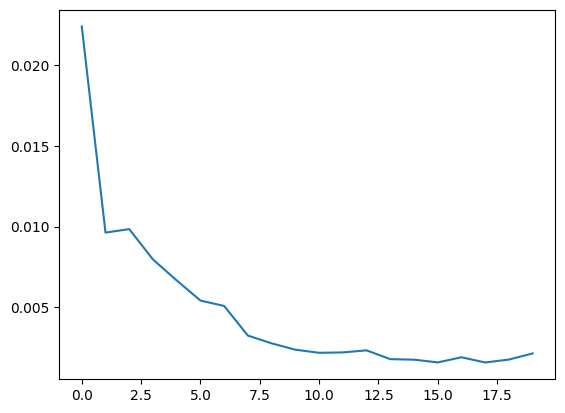

In [64]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

## Evaulate the test data

In [65]:
first_eval_batch = scaled_train[-12:]
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))
model.predict(first_eval_batch)

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))



1/1 [==============================] - 0s 174ms/step


In [66]:
current_batch.shape

(1, 12, 1)

In [67]:
np.append(current_batch[:,1:,:],[[[99]]],axis=1)

array([[[ 0.80776135],
        [ 0.72313873],
        [ 0.89870929],
        [ 1.        ],
        [ 0.71672793],
        [ 0.88648602],
        [ 0.75869732],
        [ 0.82742115],
        [ 0.87443371],
        [ 0.96025301],
        [ 0.5584238 ],
        [99.        ]]])

In [68]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))
# go beyond len(test) to go into the unknown future (no way to measure success except wait!)
for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 22ms/step


## Inverse predictions and compare

In [69]:
true_predictions = scaler.inverse_transform(test_predictions)
test['Predictions'] = true_predictions

/tmp/ipykernel_4656/4268826688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<Axes: xlabel='DATE'>

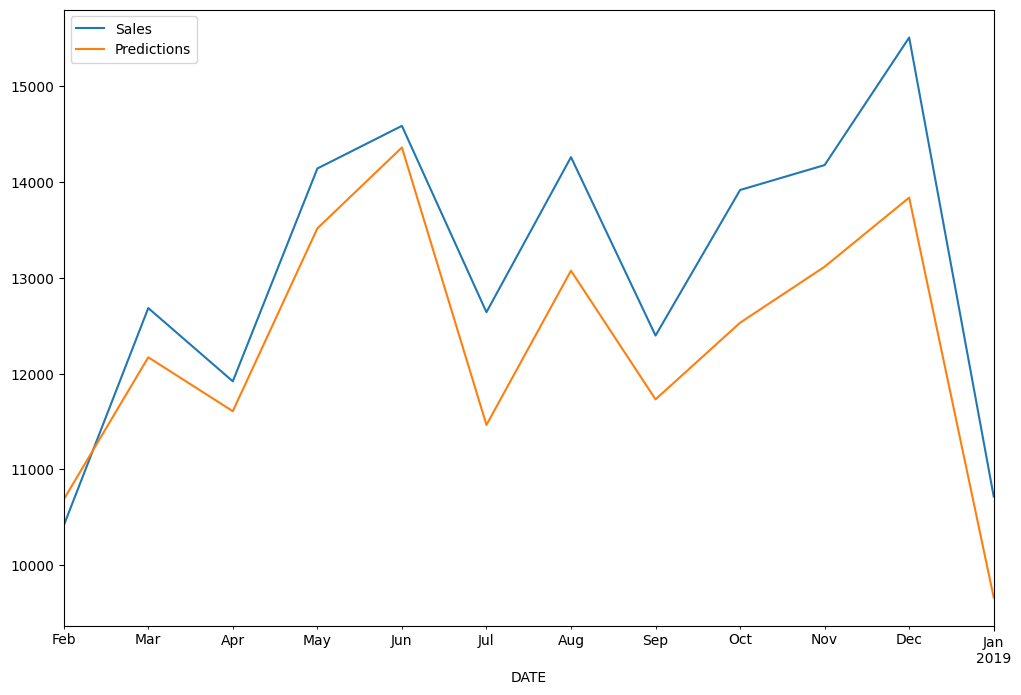

In [70]:
test.plot(figsize=(12,8))